# Background Question:

    Can a novice stock investor build an accurate investment model using Data Science to predict stocks

##### Data Science; David Francis Capstone Project
# Libraries and Dependencies

In [1]:
#Import all libraries and dependencise
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as mticker
import pandas_datareader.data as web
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

# Stock Data Retrieval

In [3]:
style.use('ggplot')

#Twenty year stock data
start = dt.datetime(2000,1,1)
end = dt.datetime.now()


#User adds any stock they want to query and Yahoo Finance goes out and get the stock data
mystock = input("Enter a Stock you are interested in: ")
print("Fetching Data for: " +mystock)

#Yahoo goes out and gets the stock data for the stock you entered plus the S&P 500 for the past 10 years
df = web.DataReader(mystock, 'yahoo', start,end)
sp = web.DataReader('SPY', 'yahoo', start,end)
vx = web.DataReader('VIX', 'yahoo', start,end)

#Enter the full name of the companies stock symbol you entered
mycompany = input("Enter the full name of the companies stock: ")

#Make company name and stock symbol equal to each other
mystock = mycompany

Enter a Stock you are interested in: FB
Fetching Data for: FB
Enter the full name of the companies stock: Facebook


# View Stock Details

In [11]:
#Print the last day the stock traded on the New York Stock Exchange
print(mycompany,  " stock last day trade")
df.tail(1)

Facebook  stock last day trade


High         Low        Open       Close    Volume  \
Date                                                                   
2020-03-16  159.130005  143.100006  152.320007  146.009995  38536415   

             Adj Close  PCT_Change  
Date                                
2020-03-16  146.009995   -0.041426

In [12]:
#Calculate the Percentage change for that day
df['PCT_Change']=(df['Close'] - df['Open'])/ df['Open']
print(df['PCT_Change'].tail(1))

Date
2020-03-16   -0.041426
Name: PCT_Change, dtype: float64


In [13]:
print(df.shape)
print(sp.shape)

(1968, 7)
(5082, 6)


# Exploratory Data Analysis

In [14]:
df.describe()

High          Low         Open        Close        Volume  \
count  1968.000000  1968.000000  1968.000000  1968.000000  1.968000e+03   
mean    113.223313   110.768755   112.025534   112.043272  3.303972e+07   
std      58.645975    57.662731    58.159386    58.206018  2.968228e+07   
min      18.270000    17.549999    18.080000    17.730000  5.913100e+06   
25%      65.105001    63.507499    64.315001    64.437498  1.613775e+07   
50%     114.224998   112.005001   112.935001   113.035000  2.399845e+07   
75%     169.699997   166.335003   167.942501   168.209999  4.026700e+07   
max     224.199997   221.279999   222.570007   223.229996  5.735764e+08   

         Adj Close   PCT_Change  
count  1968.000000  1968.000000  
mean    112.043272    -0.000085  
std      58.206018     0.017359  
min      17.730000    -0.090844  
25%      64.437498    -0.008903  
50%     113.035000     0.000267  
75%     168.209999     0.009028  
max     223.229996     0.112438

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2012-05-18 to 2020-03-16
Data columns (total 7 columns):
High          1968 non-null float64
Low           1968 non-null float64
Open          1968 non-null float64
Close         1968 non-null float64
Volume        1968 non-null int64
Adj Close     1968 non-null float64
PCT_Change    1968 non-null float64
dtypes: float64(6), int64(1)
memory usage: 123.0 KB


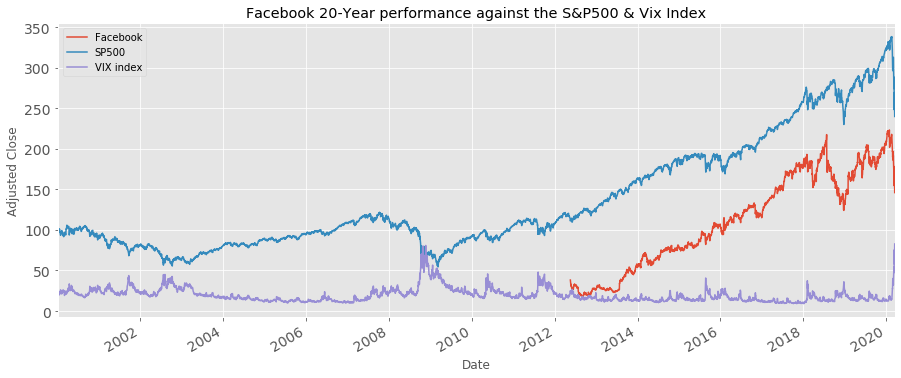

In [16]:
vx = web.DataReader('^VIX', 'yahoo', start,end)
df['Adj Close'].plot(figsize=(15,6), label=mystock, fontsize=14, grid=True)
sp['Adj Close'].plot(figsize=(15,6), label="SP500", fontsize=14, grid=True)
vx['Adj Close'].plot(figsize=(15,6), label="VIX index", fontsize=14, grid=True)
plt.ylabel('Adjusted Close')
plt.title(mycompany +' 20-Year performance against the S&P500 & Vix Index')
plt.legend(loc='upper left')
plt.show()

# 100 Day Moving Average of Stock

In [17]:
#Setup a 100 day moving average for the stock you selected
df['100d_ma'] = df['Adj Close'].rolling(window = 100,min_periods = 0).mean()
df.dropna(inplace=True)

In [18]:
#Setup a 100 day moving average for the S&P 500 stocks
sp['100d_ma'] = sp['Adj Close'].rolling(window = 100,min_periods = 0).mean()
sp.dropna(inplace=True)

In [19]:
#Setup a 100 day moving average for the VIX Index
vx['100d_ma'] = vx['Adj Close'].rolling(window = 100,min_periods = 0).mean()
vx.dropna(inplace=True)

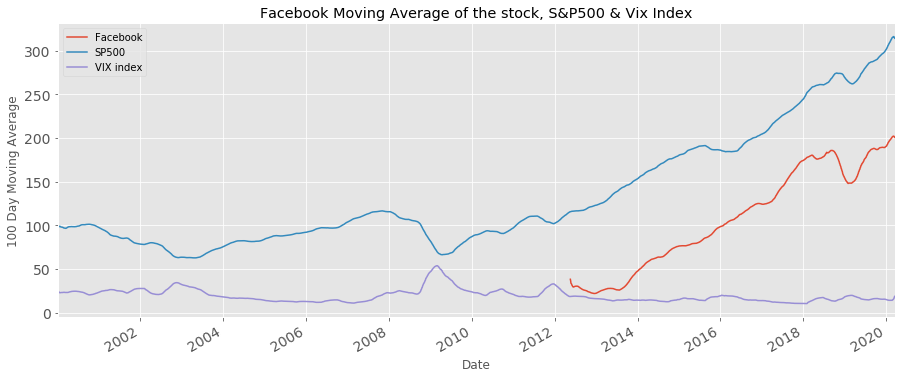

In [20]:
df['100d_ma'].plot(figsize=(15,6), label=mystock, fontsize=14, grid=True)
sp['100d_ma'].plot(figsize=(15,6), label="SP500", fontsize=14, grid=True)
vx['100d_ma'].plot(figsize=(15,6), label="VIX index", fontsize=14, grid=True)
plt.ylabel('100 Day Moving Average')
plt.title(mycompany +' Moving Average of the stock, S&P500 & Vix Index')
plt.legend(loc='upper left')
plt.show()

In [21]:
#Check the high percentage change of the stock you chose
df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open']
df.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2020-03-10  178.289993  169.500000  174.669998  178.190002  24517800   
2020-03-11  175.880005  167.660004  174.009995  170.240005  20373900   
2020-03-12  166.600006  154.339996  159.539993  154.470001  43266300   
2020-03-13  170.789993  157.600006  163.529999  170.279999  35000500   
2020-03-16  159.130005  143.100006  152.320007  146.009995  38536415   

             Adj Close  PCT_Change   100d_ma  
Date                                          
2020-03-10  178.190002    0.020152  201.9243  
2020-03-11  170.240005   -0.021665  201.7312  
2020-03-12  154.470001   -0.031779  201.3720  
2020-03-13  170.279999    0.041277  201.2163  
2020-03-16  146.009995   -0.041426  200.7788

In [22]:
#Check the high low percentage change of the stock you chose
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close']
df.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2020-03-10  178.289993  169.500000  174.669998  178.190002  24517800   
2020-03-11  175.880005  167.660004  174.009995  170.240005  20373900   
2020-03-12  166.600006  154.339996  159.539993  154.470001  43266300   
2020-03-13  170.789993  157.600006  163.529999  170.279999  35000500   
2020-03-16  159.130005  143.100006  152.320007  146.009995  38536415   

             Adj Close  PCT_Change   100d_ma    HL_PCT  
Date                                                    
2020-03-10  178.190002    0.020152  201.9243  0.049329  
2020-03-11  170.240005   -0.021665  201.7312  0.048285  
2020-03-12  154.470001   -0.031779  201.3720  0.079368  
2020-03-13  170.279999    0.041277  201.2163  0.077461  
2020-03-16  146.009995   -0.041426  200.7788  0.109787

# Support Vector Regression

In [23]:
# Get the Adjusted Close Price 
df = df[['Adj Close']] 
# Take a look at the new data 
df.tail()

Adj Close
Date                  
2020-03-10  178.190002
2020-03-11  170.240005
2020-03-12  154.470001
2020-03-13  170.279999
2020-03-16  146.009995

In [24]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
df.tail()

Adj Close  Prediction
Date                              
2020-03-10  178.190002         NaN
2020-03-11  170.240005         NaN
2020-03-12  154.470001         NaN
2020-03-13  170.279999         NaN
2020-03-16  146.009995         NaN

In [25]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 38.22999954]
 [ 34.02999878]
 [ 31.        ]
 ...
 [223.22999573]
 [209.52999878]
 [201.91000366]]


In [27]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 30.77000046  31.20000076  31.46999931 ... 154.47000122 170.27999878
 146.00999451]


In [28]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print(mystock + " Support Vector Regression score is: ")
print("svm confidence: ", svm_confidence)

Facebook Support Vector Regression score is: 
svm confidence:  0.9643776659511875


# Lasso Regression

In [31]:
lasso_regression = Lasso(alpha=0.001) 
lasso_regression

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
lasso_regression.fit(X_train, y_train)
pred = lasso_regression.predict(X_test)
print(mystock + " Lasso Regression score is: ")
r2_score(y_test,pred)

Facebook Lasso Regression score is: 


0.965844112713643

# Ridge Regression

In [34]:
ridge_regression = Ridge(alpha=0.01) 
ridge_regression

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
ridge_regression.fit(X_train, y_train)
pred = ridge_regression.predict(X_test)

In [36]:
print(mystock + " Ridge Regression score is: ")
r2_score(y_test,pred)

Facebook Ridge Regression score is: 


0.9658441172565516

# Linear Regression

In [37]:
days = 90
df['Shifted'] = df['Adj Close'].shift(-days)
df.dropna(inplace=True)

In [38]:
#Prepare the data for learning
X = np.array(df.drop(['Shifted'],1))
y = np.array(df['Shifted'])
X = preprocessing.scale(X)

In [39]:
#Split the data with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [40]:
#Determines stock accuracy in percentage. The better the stock performs against the S&P the better the accuracy
clf = LinearRegression()
clf.fit(X_train,y_train)
accuracy_train = clf.score(X_train,y_train)
accuracy_test = clf.score(X_test,y_test)
print(mycompany, 'Linear Regression score is:')
print('training accuracy:', accuracy_train)
print('testing accuracy:',accuracy_test)

Facebook Linear Regression score is:
training accuracy: 0.9365752840396566
testing accuracy: 0.9301378083876158
